# **Exploración de los datos**

In [ ]:
import pandas as pd

# Cargar el dataset
file_path = 'online_retail.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.duplicated().sum()

5268

In [ ]:
# Obtenemos los valores únicos
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f'Columna: {col}')
    print(f'Número de valores únicos: {len(values)}')
    print(f'Valores únicos: {values[:10]}')
    print('-' * 50)

Columna: InvoiceNo
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Número de valores únicos: 722
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

# **Limpieza de los datos**

In [ ]:
df_cleaned = df.drop_duplicates()

df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

In [ ]:
df_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df_cleaned.duplicated().sum()

0

# **Desglose de la información**

In [ ]:
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [ ]:
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


# **Análisis de la información**

In [ ]:
df_sales_by_year = df_cleaned.groupby('Year')['TotalAmount'].sum()
df_sales_by_year

,TotalAmount
Year,
2010,552372.860
2011,7726146.564


In [ ]:
df_cleaned['Semester'] = df_cleaned['Month'].apply(lambda x:1 if x<=6 else 2)

In [ ]:
df_sales_by_semester = df_cleaned.groupby(['Year','Semester'])['TotalAmount'].sum()
df_sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

# **Visualización**

In [ ]:
# Cuando una cantidad es negativa significa que es una devolución
total_returns = df_cleaned[df_cleaned['Quantity'] < 0]
total_returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,12,2
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,12,2
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,12,2
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,12,2
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,12,2
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,12,2
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,12,2


In [ ]:
total_non_returns = df_cleaned[df_cleaned['Quantity'] >= 0].shape[0]
total_non_returns

392732

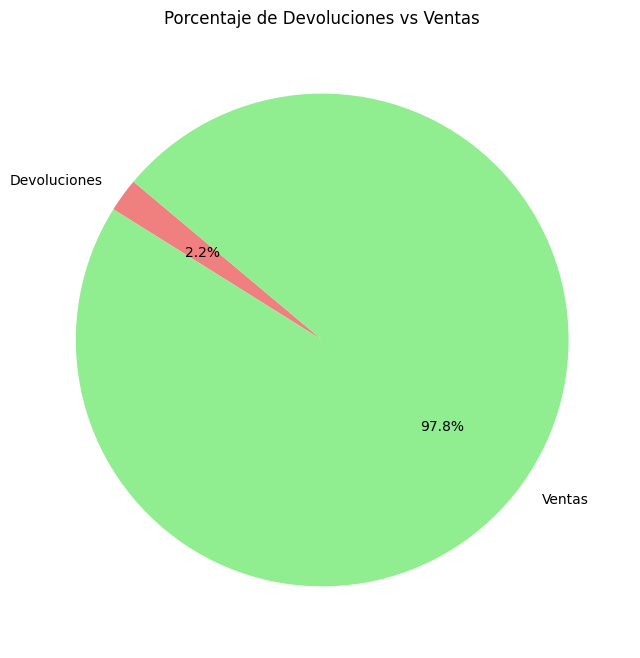

In [ ]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'Ventas']
sizes = [total_returns, total_non_returns]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize = (8,8))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Porcentaje de Devoluciones vs Ventas')
plt.show()

In [ ]:
# Nueva columna categórica basada en el monto total de la transacción
def categorize_total_amount(amount):
  if amount < 20:
    return 'Low'
  elif amount < 100:
    return 'Medium'
  else:
    return 'High'

df_cleaned['AmountCategory'] = df_cleaned['TotalAmount'].apply(categorize_total_amount)

print(df_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Month  Semester AmountCategory  
0  2010     12         2            Low  
1  2010     12      

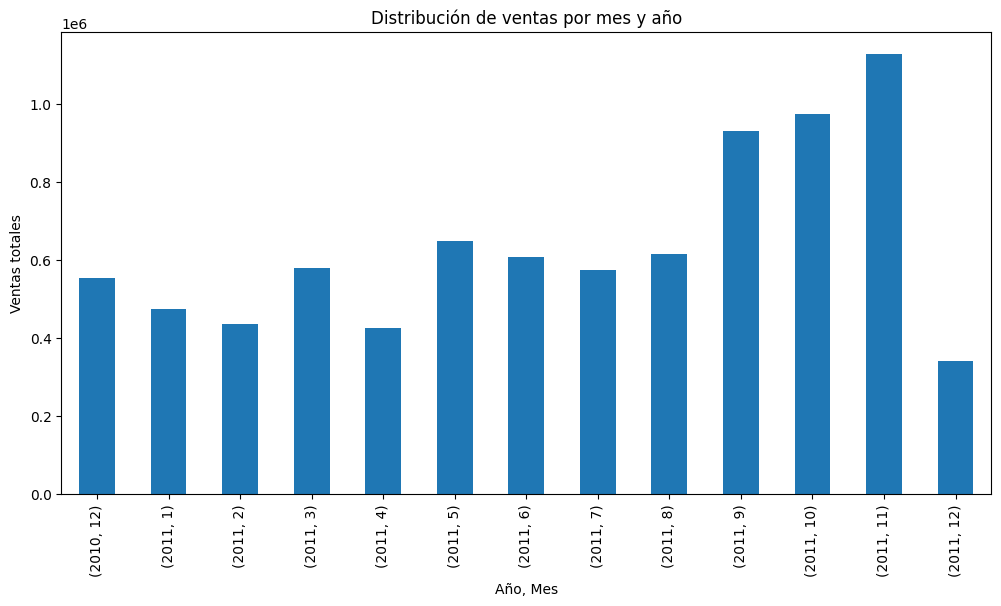

In [ ]:
plt.figure(figsize = (12,6))

#Gráfico de barras
df_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Distribución de ventas por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas totales')
plt.show()

In [ ]:
top_products = df_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
# índices limpios
top_products = top_products.reset_index()
top_products = pd.merge(top_products, df_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')

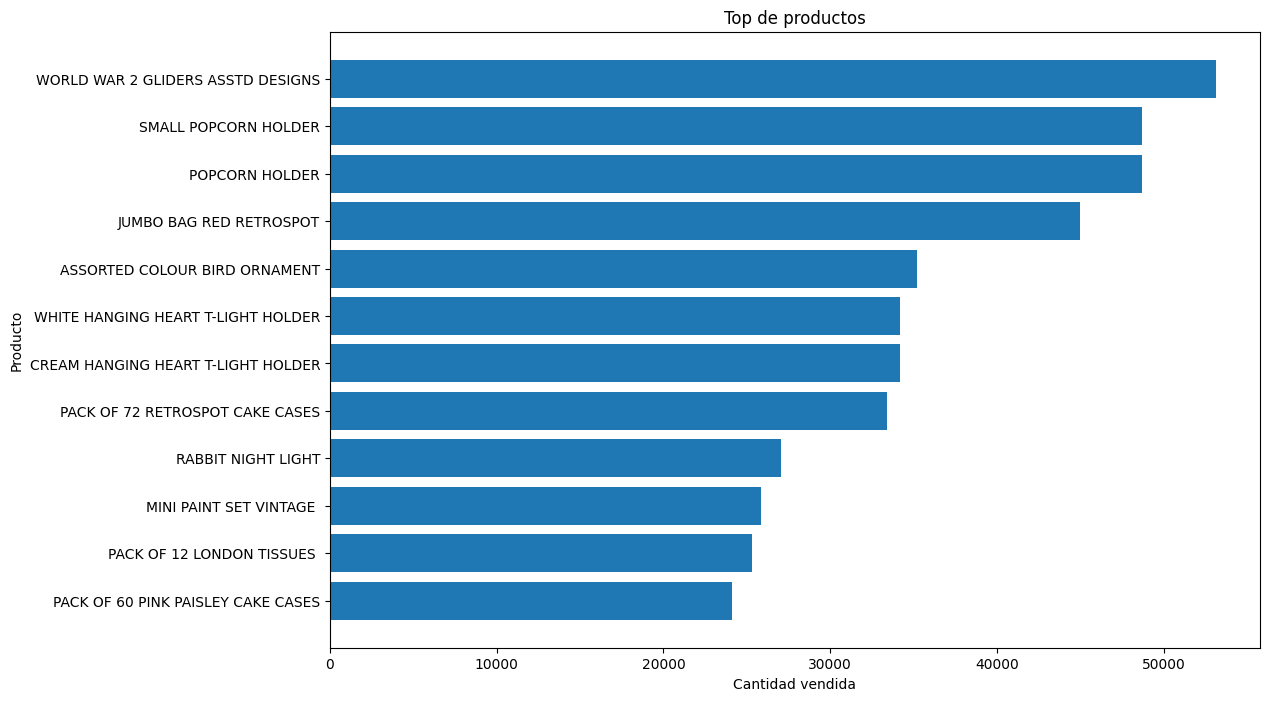

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top de productos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()